In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [145]:
# Printing column names for reference
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [71]:
# Find the most recent date in the data set.
mostmostRecentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mostmostRecentDate

('2017-08-23')

2017
08
23
After formatting as date:
2017-08-23

2016-08-23


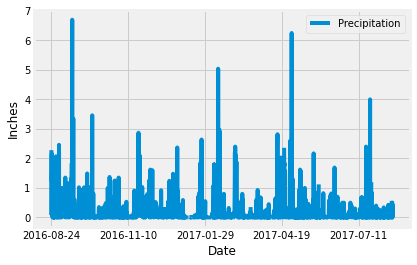

In [135]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
formattedMostRecentDate = str(mostmostRecentDate).strip("(),'") #stripping unnecessary characters
intdateList = formattedMostRecentDate.split('-') #splitting the formatted date to a list
for number in dateList:
    print(number)
most_recent_query_date = dt.date(int(dateList[0]), int(dateList[1]), int(dateList[2]))
print(f"After formatting as date:\n{most_recent_query_date}\n")

# Calculate the date one year from the last date in data set.
query_date = most_recent_query_date - dt.timedelta(days=365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores
query_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query_result)
df.set_index("date", inplace=True)

# Sort the dataframe by date
df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
graph = df.plot()
graph.set_xlabel("Date")
graph.set_ylabel("Inches")
graph.legend(labels=["Precipitation"])

In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [144]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.station)).all()
print(f"There are {str(station_count).strip('[(,)]')} stations.")

There are 9 stations.


In [156]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [157]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_single_station = most_active_stations[0][0] #list of lists -- getting the 0th element of the outer list and then the 0th element of the inner list, i.e. the station ID
most_active_single_station

'USC00519281'

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()